In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

%matplotlib notebook

plt.xkcd()

# Singular Value Decomposition for Data Visualization

## Displaying high-dimensional data using reduced-rank matrices

When exploring a dataset, it is natural to want to view the data graphically. If the data is highly dimensional, you can use Singular Value Decomposition (SVD) to find a reduced-rank approximation of the data that can be visualized easily.

## Example 1: the Iris dataset

We start off with the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The data is multivariate, with 150 measurements of 4 features (length and width cm of both sepal and petal) on 3 distinct Iris species. Of the 150 measurements, there are 50 measurements each for _Iris setosa_, _Iris versicolor_, and _Iris virginica_.

[Scikit Learn's `datasets`](http://scikit-learn.org/stable/datasets/) includes the Iris dataset, so let's load that up and start exploring.

In [2]:
iris = load_iris()

dataset_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print('Iris dataset has {} rows and {} columns\n'.format(*dataset_iris.shape))

print('Here are the first 5 rows of the data:\n\n{}\n'.format(dataset_iris.head(5)))

print('Some simple statistics on the Iris dataset:\n\n{}\n'.format(dataset_iris.describe()))

Iris dataset has 150 rows and 4 columns

Here are the first 5 rows of the data:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Some simple statistics on the Iris dataset:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000   

As we are exploring the dataset, it would be nice to view the data in order to get an idea of how the 3 species might be distributed with respect to one another in terms of their features. Perhaps we are interested in finding clusters, or maybe we would like to find a way to make class predictions?

However, since the data has 4 dimensions, we would be hard-pressed to come up with a good way to graph the data in 4D that we could easily understand.

_But what if we could reduce or compress the data so that we could work in 2 or 3 dimensions?_

[Singular value decomposition](http://mathworld.wolfram.com/SingularValueDecomposition.html) lets us do just that.

## Singular value decomposition

Singular value decomposition factorizes an $\mathbb{R}^{m \times n}$ matrix $X$ into

* matrix $U \in \mathbb{R}^{m \times m}$ are the left singular vectors of $X$, or the set of orthonormal eigenvectors of $X \, X^{\intercal}$ (with respect to rows of $X$)
* diagonal matrix $\Sigma$ with entries $\sigma \in \mathbb{R}$ that are the non-negative singular values of $X$
* matrix $V \in \mathbb{R}^{n \times n}$ are the right singular vectors $X$, or the set of orthonormal eigenvectors of $X^{\intercal} \, X$ (with respect to columns of $X$)

such that 

\begin{align}
  X &= U \, \Sigma \, V^{\intercal}
\end{align}

We can use [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) to factorize the Iris data matrix into three components $U$, $\Sigma$, and $V^{\intercal}$.

In [3]:
U_iris, S_iris, Vt_iris = np.linalg.svd(dataset_iris)

#### $U$: left singular vectors of $X$

In [4]:
print('matrix U has {} rows, {} columns\n'.format(*U_iris.shape))

print('{}'.format(pd.DataFrame(U_iris).head(5)))

matrix U has 150 rows, 150 columns

        0         1         2         3         4         5         6    \
0 -0.061617  0.129969 -0.000056  0.001058 -0.073179 -0.081571 -0.069303   
1 -0.058072  0.111371  0.068439  0.052115 -0.127666 -0.142615 -0.129771   
2 -0.056763  0.118295  0.002311  0.009078 -0.010367  0.012712  0.021947   
3 -0.056654  0.105608  0.004218 -0.042215 -0.040903 -0.009878 -0.022402   
4 -0.061230  0.131431 -0.033908 -0.033254  0.979924 -0.021636 -0.019800   

        7         8         9      ...          140       141       142  \
0 -0.071247 -0.062021 -0.066137    ...    -0.102203 -0.108392 -0.081006   
1 -0.102197 -0.078402 -0.068525    ...     0.027873  0.029108  0.037220   
2 -0.040583 -0.045632 -0.084427    ...     0.059291 -0.040847  0.089081   
3 -0.043891 -0.037508 -0.067710    ...     0.176345  0.268409  0.019061   
4 -0.016901 -0.013404 -0.013042    ...     0.001694  0.004298 -0.000120   

        143       144       145       146       147       148 

#### $V$: right singular vectors of $X$


**NOTE**: [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) actually returns $V^{\intercal}$ instead of $V$.

In [5]:
print('matrix Vt has {} rows, {} columns\n'.format(*Vt_iris.shape))

print('{}'.format(pd.DataFrame(Vt_iris).head()))

matrix Vt has 4 rows, 4 columns

          0         1         2         3
0 -0.751168 -0.379788 -0.513151 -0.167879
1  0.285831  0.544890 -0.708899 -0.344758
2  0.499424 -0.675025 -0.054720 -0.540299
3  0.323455 -0.321243 -0.480775  0.749023


#### $\Sigma$: singular values of $X$

The elements $\sigma$ of diagonal matrix $\Sigma$ are the non-zero singular values of matrix $X$, which are really just the square roots of the non-zero eigenvalues of $X^{\intercal} \, X$ (and also for $X \, X^{\intercal}$). These singular values can be used to determine the amount of variance $X^{\prime}$ explains of the original data matrix $X$ when reducing the dimensions to find a lower rank approximation.

\begin{align}
   X^{\prime}_{k} &=  U_{k} \, \Sigma_{k} \, V^{\intercal}_{k} \\
                           &\approx X_{r} & \text{ where } rank(X^{\prime}) = k \lt rank(X) = r
\end{align}

The amount of variance that the reduced rank approximation $X^{\prime}_{k}$ explains of $X_{r}$ is

\begin{align}
  \text{cum. variance explained} &= \frac{\sum_{j=1}^{k} \sigma_{j}^{2}}{\sum_{i=1}^{r} \sigma_{i}^{2}}
\end{align}

**NOTE**: [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) actually returns a $\Sigma$ that is not a diagonal _matrix_, but a _list_ of the entries on the diagonal.

In [6]:
num_sv_iris = np.arange(1, S_iris.size+1)

cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]

Let's have a look at the cumulative variance explained visually as a function of the number of singular values used when reducing rank to find a lower-ranked matrix $X^{\prime}$ to approximate $X$. This will inform us as to how many dimensions we should use.

<IPython.core.display.Javascript object>


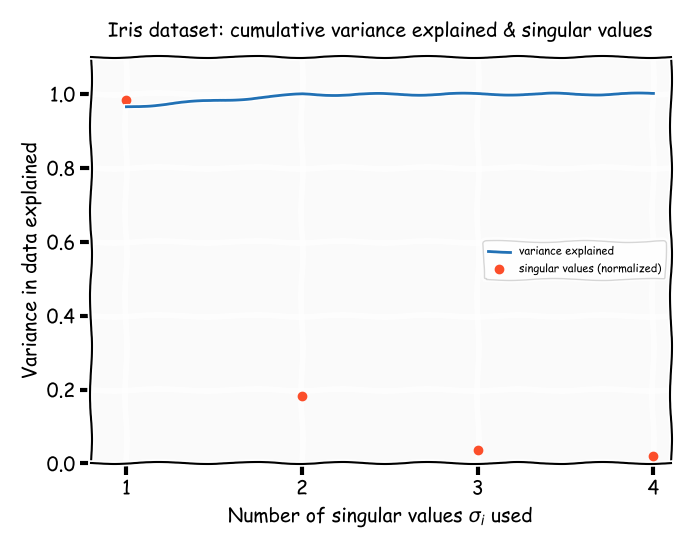

In [7]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='variance explained',
         zorder=1000)

plt.scatter(num_sv_iris,
            normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values $\sigma_{i}$ used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Iris dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

#### Dimension reduction

Judging from the curve representing cumulative variance explained in the figure above, we can see that

* with 1 singular value, about 96.5% of the variance of $X$ can be explained
* with 2 singular values, that number goes up to approximately 99.8%

Since graphing the Iris dataset in 1D wouldn't be all that interesting (just dots on a line segment), let's try using the first 2 singular values to represent the data on the $x$- and $y$-axes, respectively.

In [8]:
idx_setosa = np.where(iris.target==0)[0]
idx_versicolor = np.where(iris.target==1)[0]
idx_virginica = np.where(iris.target==2)[0]

x_setosa = U_iris[idx_setosa, 0]
y_setosa = U_iris[idx_setosa, 1]

x_versicolor = U_iris[idx_versicolor, 0]
y_versicolor = U_iris[idx_versicolor, 1]

x_virginica = U_iris[idx_virginica, 0]
y_virginica = U_iris[idx_virginica, 1]

We will use different marker shapes and colors to represent the three Iris species on our 2D graph.

<IPython.core.display.Javascript object>


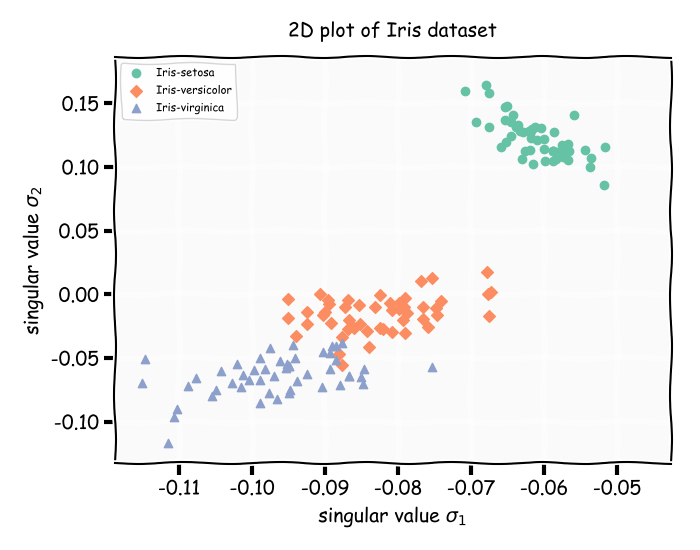

In [9]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(x_setosa,
            y_setosa,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(x_versicolor,
            y_versicolor,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(x_virginica,
            y_virginica,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('2D plot of Iris dataset',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

There!

Now that we are viewing the originally 4D data with 2 dimensions using the first 2 singular value columns of the $U$ left singular vectors matrix, we can see that there should be a very clear separation for the _Iris setosa_ class and the others. On the other hand, the demarcation between _Iris versicolor_ and _Iris virginica_ might not be as clear cut.

Nevertheless, since this 2D reduced-rank matrix representation $X^{\prime}$ explains nearly 99.8% of the variance in the original dataset, we can be pretty certain that clustering and classification should be possible.

----

## Example 2: Countries and Primary Languages

### Or, What to do when your data is categorical?

In the previous example, we were exploring the Iris dataset which is a matrix $X \in \mathbb{R}^{150 \times 4}$. Singular value decomposition helped us to find a reduced-rank matrix $X^{\prime} \in \mathbb{R}^{150 \times 2}$ that accurately approximated the original data matrix and let us visualize the data with 2 dimensions.

Let's now consider another dataset where the values are not in $\mathbb{R}$, but are _categorical_.

For this example, we explore a fictional survey of 1000 respondents from each of five countries (Canada, USA, England, Italy and Switzerland), asking them what their primary language is (among English, French, Spanish, German and Italian). So in our data we have categories for both _country_ and _language_.

We read in the data using [`pandas.dataframe.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [10]:
data_countries = pd.read_csv('data.csv', dtype='category')

print("data has {} measurements for {} variables\n".format(*data_countries.shape))

print("Here are the first 10 rows...\n\n{}\n...".format(data_countries.head(10)))

data has 5000 measurements for 2 variables

Here are the first 10 rows...

  country language
0       2        5
1       4        2
2       2        3
3       1        1
4       5        5
5       4        5
6       5        4
7       4        5
8       5        4
9       5        4
...


### Correspondence Analysis

#### Contingency table $F$

Our next step in exploring the data is to break out the data in terms of the 2 categories.

Here we convert the raw observations into a [contingency table](http://onlinestatbook.com/2/chi_square/contingency.html) $F$, with the countries as rows and the languages as columns. [`pandas.crosstab`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) will do just that.

In [11]:
countries = ['Canada', 'USA', 'England', 'Italy', 'Switzerland']
languages = ['English', 'French', 'Spanish', 'German', 'Italian']

F = pd.crosstab(data_countries.country, data_countries.language, margins=False)
F.index = countries
F.columns = languages

print("{}".format(F))

             English  French  Spanish  German  Italian
Canada           688     280       10      11       11
USA              730      31      190       8       41
England          798      74       38      31       59
Italy             17      13       11      15      944
Switzerland       15     222       20     648       95


Now say that we are interested in seeing the relation between the countries and the languages.

However, we cannot blindly apply singular value decomposition to contingency table $F$ above.

Since we are working with 2 distinct categories, we can apply [correspondence analysis](http://www.mathematica-journal.com/2010/09/an-introduction-to-correspondence-analysis/) to transform the contingency table into a form where we can use singular value decomposition. At that point, we should be able to find a reduced-rank matrix that approximates the original data, and that in turn would let us graphically represent the the relations beween countries and languages.

The idea is to use the $\chi^{2}$ distance between rows and columns as our basis for singular value decomposition, as the [$\chi^{2}$ distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) lets us calculate the independence of qualitative variables.

#### Correspondence matrix $P$

We start by first calculating the correspondence matrix $P$ where

\begin{align}
  P &= \left[ \frac{f_{ij}}{\sum_{i=1}^{I} \sum_{j=1}^{J} f_{ij}} \right] \text{ for } f_{ij} \in F
\end{align}

In [12]:
P = F / F.sum().sum()

print('correspondence matrix P:\n\n{}'.format(P))

correspondence matrix P:

             English  French  Spanish  German  Italian
Canada        0.1376  0.0560   0.0020  0.0022   0.0022
USA           0.1460  0.0062   0.0380  0.0016   0.0082
England       0.1596  0.0148   0.0076  0.0062   0.0118
Italy         0.0034  0.0026   0.0022  0.0030   0.1888
Switzerland   0.0030  0.0444   0.0040  0.1296   0.0190


#### Row centroid $p_{i+}$

Using correspondence matrix $P$, we next obtain the _row centroid_ $p_{i+}$. The row centroid can be interpreted as the marginal frequency distribution over the sum of the countries (rows), and reflects the fact that there were equally 1000 respondents per country in our fictional study.

The row centroid $p_{i+}$ is derived from correspondence matrix $P$ with

\begin{align}
  p_{i+} &= \sum_{j=1}^{J} p_{ij}
\end{align}

In [13]:
row_centroid = P.sum(axis=1)

print('row centroid (marginal frequency distribution over countries):\n\n{}'.format(row_centroid))

row centroid (marginal frequency distribution over countries):

Canada         0.2
USA            0.2
England        0.2
Italy          0.2
Switzerland    0.2
dtype: float64


#### Column centroid $p_{+j}$

Similarly, we obtain the _column centroid_ $p_{+j}$ from $P$. The column centroid can be interpreted as the marginal frequency distribution over the sum of the languages (columns).

The column centroid $p_{+j}$ is derived from correspondence matrix $P$ with

\begin{align}
  p_{+j} &= \sum_{i=1}^{I} p_{ij}
\end{align}

In [14]:
col_centroid = P.sum(axis=0)

print('column centroid (marginal frequency distribution over languages):\n\n{}'.format(col_centroid))

column centroid (marginal frequency distribution over languages):

English    0.4496
French     0.1240
Spanish    0.0538
German     0.1426
Italian    0.2300
dtype: float64


#### $\chi^{2}$ distances between countries and languages

So rather than using the contingency table $F$ as the basis for singular value decomposition, we can look at the $\chi^{2}$ distances between rows and columns for visualizing the relation between countries and languages.

The $\chi^{2}$ statistic is given by

\begin{align}
  \chi^{2} &= \sum_{i=1}^{I} \sum_{j=1}^{J} \frac{(O_{ij} - E_{ij})^{2}}{E_{ij}} \\
           &= N \, \sum_{i=1}^{I} \sum_{j=1}^{J} \frac{(p_{ij} - \mu_{ij})^{2}}{\mu_{ij}} \\
           &= N \, \Lambda^{2} \\
           \\
  \Rightarrow \Lambda^{2} &= \frac{\chi^{2}}{N} \\
   \Lambda &= \left[  \frac{p_{ij} - \mu_{ij}}{\sqrt{\mu_{ij}}} \right]
\end{align}

Inertia matrix $\Lambda$ measures the distribution of the individual profiles (rows/columns) around the average profile (centroids). Thus inertia represents the observed deviation from independence.

Through its relation with the statistic $\chi^{2}$, inertia $\Lambda$ (a matrix of _standardized residuals_) provides the basis for using singular value decomposition.

In [15]:
Mu_ij = row_centroid.values.reshape((P.index.size,1)) * col_centroid.values.reshape((1,P.columns.size))

Lambda = (P - Mu_ij) / np.sqrt(Mu_ij)

print('inertia Lambda:\n\n{}'.format(Lambda))

inertia Lambda:

              English   French   Spanish    German   Italian
Canada       0.159004  0.19812 -0.084450 -0.155852 -0.204219
USA          0.187016 -0.11811  0.262604 -0.159404 -0.176243
England      0.232370 -0.06350 -0.030464 -0.132166 -0.159458
Italy       -0.288528 -0.14097 -0.082522 -0.151114  0.665808
Switzerland -0.289862  0.12446 -0.065169  0.598536 -0.125888


#### Factorizing inertia matrix $\Lambda$ with singular value decomposition

Now that we have transformed contingency table $F$ into inertia matrix $\Lambda$ where element $\lambda_{ij} \in \mathbb{R}$, we can use singular value decomposition to factorize $\Lambda$ instead of the original raw data matrix.

In [16]:
U_lambda, S_lambda, Vt_lambda = np.linalg.svd(Lambda)

num_sv_lambda = np.arange(1, S_lambda.size+1)

cum_var_explained_lambda = [np.sum(np.square(S_lambda[0:n])) / np.sum(np.square(S_lambda)) for n in num_sv_lambda]

Once again, we look at the cumulative variance explained visually as a function of the number of singular values used when reducing rank to find a lower-ranked inertia matrix $\Lambda^{\prime}$ to approximate $\Lambda$. 

<IPython.core.display.Javascript object>


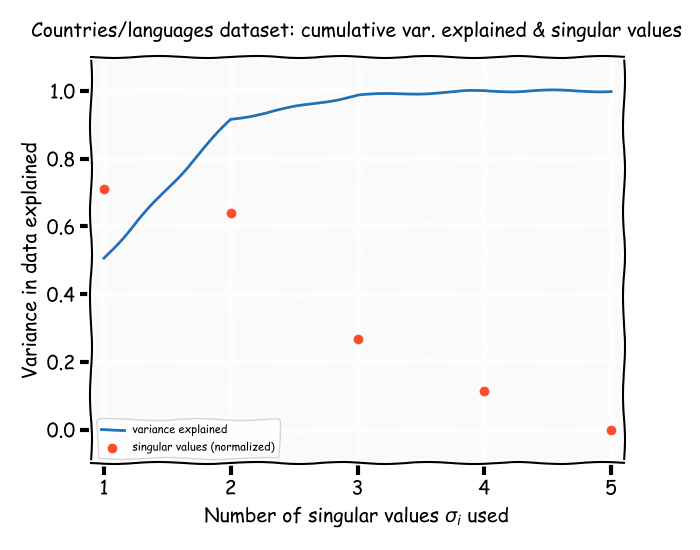

In [17]:
fig = plt.figure(figsize=(7.0, 5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_lambda,
         cum_var_explained_lambda,
         color='#2171b5',
         label='variance explained',
         zorder=1000)

plt.scatter(num_sv_lambda,
            normalize(S_lambda.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            zorder=1000)

plt.legend(loc='lower left', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_lambda)
ax.set_xlim(0.9, 5.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel(r'Number of singular values $\sigma_{i}$ used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Countries/languages dataset: cumulative var. explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

#### Dimension reduction

Judging from the curve representing cumulative variance explained with respect to the number of singular values used, we see that

* with 1 singular value, about 50.6% of the variance of inertia matrix $\Lambda$ can be explained
* with 2 singular values, that number goes up to 91.6%
* with 3 singular values, we have 98.7%

To mix things up a bit, let's try visualizing the countries and languages in 3D.

For countries, we will take the first 3 columns of $U$ as the $x$-, $y$- and $z$-coordinates.

But since `numpy.lingal.svd` returns $V^{\intercal}$ instead of $V$, we will take the first 3 _rows_ of $V^{\intercal}$ for the $x$-, $y$- and $z$-coordinates for the languages.

In [18]:
cntry_x = U_lambda[:, 0]
cntry_y = U_lambda[:, 1]
cntry_z = U_lambda[:, 2]

lang_x = Vt_lambda[0, :]
lang_y = Vt_lambda[1, :]
lang_z = Vt_lambda[2, :]

#### Visualizing the relation between countries and languages

That was a bit of work moving from raw data to contingency table, from contingency table to correspondence matrix, and then finally to the inertia matrix to singular value decomposition, but we are now ready to see how the categories of country and language relate to one another in 3 dimensions.

<IPython.core.display.Javascript object>


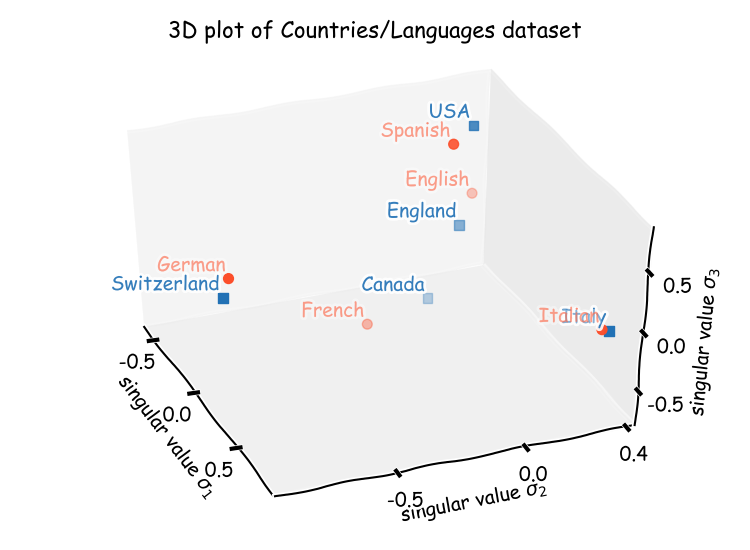

In [19]:
import pylab
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = pylab.figure(figsize=(7.5,5.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cntry_x, cntry_y, cntry_z, marker='s', s=50, c='#2171b5')
cntry_labels = []
for i,(x,y,z) in enumerate(zip(cntry_x,cntry_y,cntry_z)):
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    
    label = pylab.annotate(Lambda.index[i],
                          xy=(x2,y2),
                          xytext=(-2,2),
                          textcoords='offset points',
                          ha='right',
                          va='bottom',
                          color='#2171b5',
                          alpha=0.9)
    cntry_labels.append(label)

ax.scatter(lang_x, lang_y, lang_z, marker='o', s=50, c='#fc4e2a')
lang_labels = []
for i,(x,y,z) in enumerate(zip(lang_x,lang_y,lang_z)):
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    
    label = pylab.annotate(Lambda.columns[i],
                          xy=(x2,y2),
                          xytext=(-2,2),
                          textcoords='offset points',
                          ha='right',
                          va='bottom',
                          color='#fc4e2a',
                          alpha=0.4)
    lang_labels.append(label)

def update_position(e):
    for i,(x,y,z) in enumerate(zip(cntry_x,cntry_y,cntry_z)):
        x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
        cntry_labels[i].xy = x2, y2
    for i,(x,y,z) in enumerate(zip(lang_x,lang_y,lang_z)):
        x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
        lang_labels[i].xy = x2, y2
    fig.canvas.draw()
fig.canvas.mpl_connect('button_release_event', update_position)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_xticks([-0.5, 0.0, 0.5])
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_yticks([-0.5, 0.0, 0.4])
ax.set_zlabel(r'singular value $\sigma_{3}$')
ax.set_zticks([-0.5, 0.0, 0.5])
ax.set_title('3D plot of Countries/Languages dataset',
             fontsize=16,
             y=1.1)

plt.tight_layout()

pylab.show()

And there we are!

You can see how the anglophone countries Canada, USA and England are in close proximity of English and with each other, with Spanish being close to the USA while French is closer to Canada. German is close to Switzerland, with French somewhat in proximity. Italian, however, is out close to Italy, both being located largely in isolation from the other countries and languages.

This should match up with your intuition from contingency table $F$.

----

# Helpful Resources

* [Making sense of principal component analysis, eigenvectors & eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)
* [Correspondence analysis is a useful tool to uncover the relationships among categorical variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3718710/)

----

# Appendix A

## PCA and SVD

Principal components analysis (PCA) and singular value decomposition are closely related, and you may often hear both these terms used in the same breath.  

Here is a quick mathematical treatment explaining how PCA and SVD are related.

Consider data matrix $X \in \mathbb{R}^{m \times n}$ where $m > n$, and all $x_{ij}$ are centered about the column means. With principal components analysis, we have

\begin{align}
  \text{covariance matrix } C &= \frac{1}{m} \, X^{\intercal} \, X & \text{from PCA} \\
  &= \frac{1}{m} \, V \, \Lambda \, V^{\intercal} & \text{by eigendecomposition of } X^{\intercal} \, X \\
  \\
  \text{ but } X &= U \, \Sigma V^{\intercal} & \text{from SVD} \\
  \\
  \Rightarrow C &= \frac{1}{m} \, V \, \Sigma \, U^{\intercal} \, U \, \Sigma V^{\intercal} \\
  &= \frac{1}{m} \, V \, \Sigma^{2} \, V^{\intercal} \\
\end{align}

So we see that:

1. the singular values $\sigma_i$ in $\Sigma$ obtained via SVD are really just the square roots of the eigenvalues $\lambda_{i}$ in $\Lambda$ of the covariance matrix in PCA.
1. if you mean-center your raw data matrix $X$ and then calculate SVD, you are doing the same thing as PCA.
1. the above example shows covariance of $X$ with respect to its columns ($X^{\intercal} \, X$); it also applies for covariance of $X$ with respect to rows ($X \, X^{\intercal}$).

#### Iris dataset: PCA & SVD

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.data)

# don't forget to mean-center the data before SVD
X = iris.data - np.mean(iris.data, axis=0)
U, S, Vt = np.linalg.svd(X)

#### Compare the eigenvalues $\lambda_{i}$ of $\Lambda$ derived from PCA with the $\sigma_{i}^2$ from $\Sigma$ derived with SVD:

In [21]:
C = pca.get_covariance()

print('eigenvalues from PCA:\n{}\n'.format(np.linalg.eigvals(C * X.shape[0])))

print('squared singular values from SVD:\n{}'.format(np.square(S)))

eigenvalues from PCA:
[ 629.50127448   36.09429217   11.70006231    3.52877104]

squared singular values from SVD:
[ 629.50127448   36.09429217   11.70006231    3.52877104]


#### Can we obtain the covariance matrix $C$ derived with PCA, but using  $\frac{1}{m} \, V \, \Sigma^{2} \, V^{\intercal}$ from SVD?

In [22]:
print('covariance matrix C derived from PCA:\n{}\n'.format(C))

C_svd = (1. / X.shape[0]) * Vt.T.dot(np.diag(np.square(S))).dot(Vt) 
print('covariance matrix using S and Vt from SVD:\n{}\n'.format(C_svd))

print('Are these matrices equivalent (element-wise closeness comparison)?\n{}'.format(np.isclose(C, C_svd)))

covariance matrix C derived from PCA:
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]

covariance matrix using S and Vt from SVD:
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]

Are these matrices equivalent (element-wise closeness comparison)?
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
